In [1]:
library(rstan)
library(brms)
library(here)
library(ggplot2)
library(bayesplot)

# 計算の高速化
rstan_options(auto_write = TRUE)
options(mc.cores = parallel::detectCores())


要求されたパッケージ StanHeaders をロード中です


rstan version 2.32.6 (Stan version 2.32.2)


For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)
For within-chain threading using `reduce_sum()` or `map_rect()` Stan functions,
change `threads_per_chain` option:
rstan_options(threads_per_chain = 1)


要求されたパッケージ Rcpp をロード中です

Loading 'brms' package (version 2.21.0). Useful instructions
can be found by typing help('brms'). A more detailed introduction
to the package is available through vignette('brms_overview').


次のパッケージを付け加えます: ‘brms’


以下のオブジェクトは ‘package:rstan’ からマスクされています:

    loo


以下のオブジェクトは ‘package:stats’ からマスクされています:

    ar


here() starts at /media/e595/Game/プロジェクト置き場/RとStanで始めるベイズ統計モデリング

This is bayesplot version 1.11.1

- Online documentation and vignettes at mc-stan.org/bayesplot

- bayesplot theme set to bayesplot:

In [5]:
# データ読み込み
sales_climate <- read.csv(here("data", "3-7-1-beer-sales-4.csv"))
head(sales_weather)


,sales,weather,temperature
,<dbl>,<chr>,<dbl>
1,40.64334,cloudy,13.7
2,99.55268,cloudy,24.0
3,85.32685,cloudy,21.5
4,69.28788,cloudy,13.4
5,71.09942,cloudy,28.9
6,107.18977,cloudy,28.9


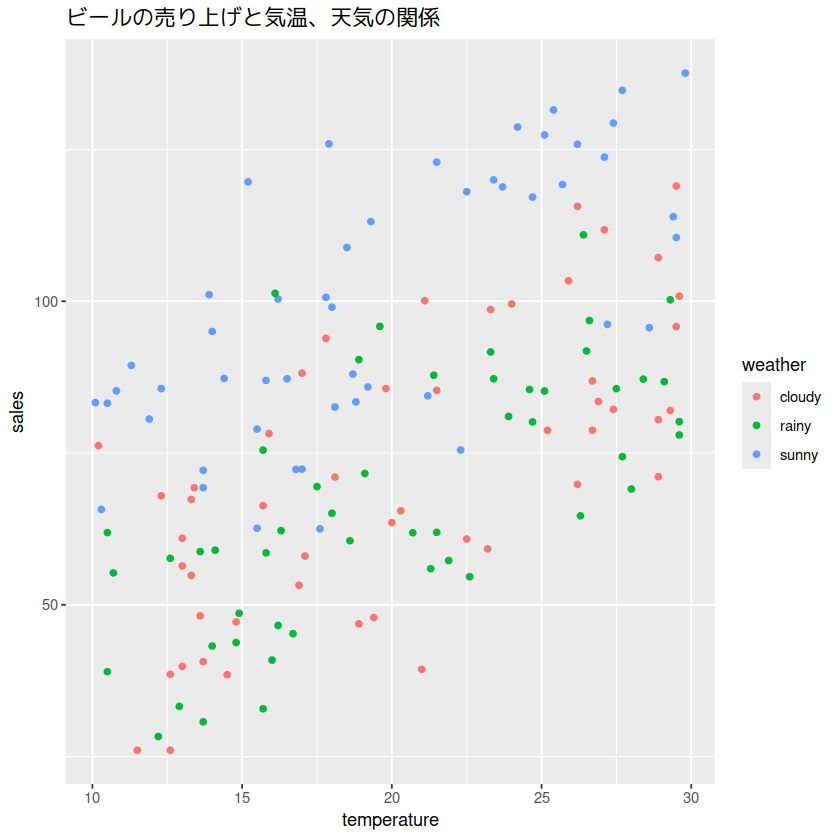

In [6]:
ggplot(
  data = sales_climate,
  mapping = aes(x = temperature, y = sales)
) +
  geom_point(aes(color = weather)) +
  labs(title = "ビールの売り上げと気温、天気の関係")


In [7]:
# 正規線形モデルを作る
lm_brms <- brm(
  formula = sales ~ weather + temperature,
  family = gaussian(),
  data = sales_climate,
  seed = 1,
  prior = c(
    set_prior("", class = "Intercept"),
    set_prior("", class = "sigma")
  )
)


Compiling Stan program...

Start sampling



In [8]:
# 結果確認
lm_brms


 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: sales ~ weather + temperature 
   Data: sales_climate (Number of observations: 150) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Regression Coefficients:
             Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept       20.17      4.91    10.52    29.89 1.00     4297     3033
weatherrainy    -3.54      3.17    -9.65     2.79 1.00     4122     2993
weathersunny    29.50      3.19    23.28    35.72 1.00     4296     3345
temperature      2.55      0.22     2.11     2.98 1.00     4532     2846

Further Distributional Parameters:
      Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sigma    16.05      0.94    14.37    17.97 1.00     4494     2862

Draws were sampled using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and Rhat is the potential
scale reduction factor on split c

Warning message:
“Method 'marginal_effects' is deprecated. Please use 'conditional_effects' instead.”


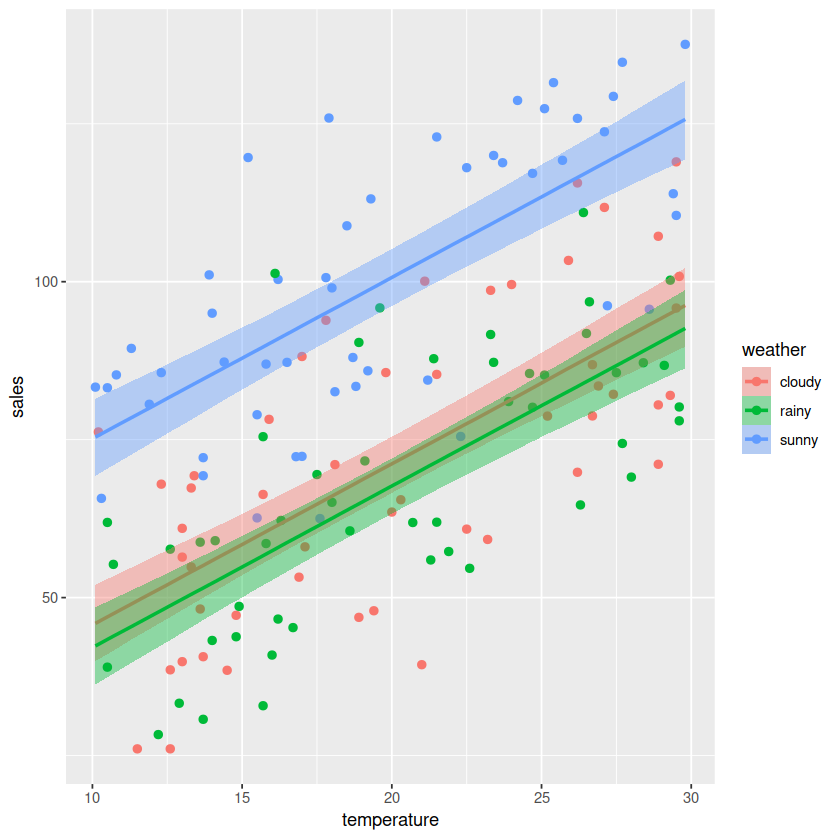

In [9]:
# 回帰直線
eff <- marginal_effects(lm_brms, effects = "temperature:weather")
plot(eff, points = TRUE)
